In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import itertools
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [2]:
DPATH = '/projectnb2/dl523/projects/COVIDCT2/dataset'
label_map = {"no IDC": 0, "IDC": 1}
torch.cuda.empty_cache()

In [11]:
train_transformer = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomResizedCrop((64,64), scale=(0.5,1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize((0.8279,0.5822,0.7566),(0.1137,0.1326,0.0875))
])

val_transformer = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.8279,0.5822,0.7566),(0.1137,0.1326,0.0875))
])

In [12]:
class BreastCancerDataset(Dataset):
    def __init__(self, root_dir, npy_IDC, npy_NonIDC, transform=None, target_transform=None):
        """
        Args:
            root_dir (string): Path to all data
            npy_path (string): Path to the txt file with annotations.
            transform: image augmentation 
        """
        self.root_dir = root_dir
        self.npy_path = [npy_IDC, npy_NonIDC]
        X_IDC = np.load(os.path.join(self.root_dir, self.npy_path[0]))
        X_nonIDC = np.load(os.path.join(self.root_dir, self.npy_path[0]))
        self.X = np.concatenate((X_IDC, X_nonIDC))
        self.X = np.concatenate((X_IDC, X_nonIDC))
        
        Y_IDC = np.ones(X_IDC.shape[0],dtype=np.int64)
        Y_nonIDC = np.zeros(X_nonIDC.shape[0],dtype=np.int64)
        self.Y = np.concatenate((Y_IDC, Y_nonIDC))
        
        assert np.issubdtype(self.Y.dtype, np.integer)
        assert self.Y.ndim == 1
        assert np.issubdtype(self.X.dtype, np.uint8)
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.X)
        
    def __getitem__(self,index):
        
        ## get image & label
        image, label = self.X[index], self.Y[index]
        
        ## transform 
        if self.transform is not None:
            image = self.transform(image)
        if self.target_transform is not None:
            label = self.target_transform(label)
            
        return image, label

In [13]:
npy_IDC_train = 'IDC/IDC/train_IDC.npy'

npy_NonIDC_train = 'IDC/non_IDC/train_nonIDC.npy'


trainset = BreastCancerDataset(DPATH, npy_IDC_train, npy_NonIDC_train,
                               transform=train_transformer)

BC_dataloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=1)

In [14]:
trainset.__getitem__(5)

(tensor([[[ 0.9273,  0.9963,  0.9963,  ..., -2.6942, -2.6942, -2.4528],
          [ 0.9273,  0.9618,  0.9618,  ..., -2.0044, -2.2458, -2.1424],
          [ 0.9273,  0.9618,  0.9273,  ..., -1.2801, -1.6940, -1.7630],
          ...,
          [-1.2111, -1.4525, -0.8662,  ..., -0.5903, -0.7282, -0.7282],
          [-0.0729, -0.5213, -0.3489,  ..., -0.4178, -0.5213, -0.8317],
          [ 0.8928,  0.3410,  0.1685,  ..., -0.2799, -0.2799, -0.7627]],
 
         [[ 2.5889,  2.6185,  2.6185,  ..., -1.6698, -1.7585, -1.5219],
          [ 2.5889,  2.5889,  2.5889,  ..., -1.0487, -1.4628, -1.3741],
          [ 2.5889,  2.5889,  2.6185,  ..., -0.4277, -1.0783, -1.2262],
          ...,
          [-0.1024, -0.3981,  0.3413,  ..., -0.0136, -0.3685, -0.4572],
          [ 1.2876,  0.7257,  0.8736,  ...,  0.4300,  0.1047, -0.3685],
          [ 2.4115,  1.7017,  1.3764,  ...,  0.7849,  0.5779, -0.2207]],
 
         [[ 2.0198,  2.0646,  2.0198,  ..., -2.1034, -2.1483, -1.9242],
          [ 1.9750,  2.0198,

In [15]:
trainset.__getitem__(5)[0].shape

torch.Size([3, 64, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


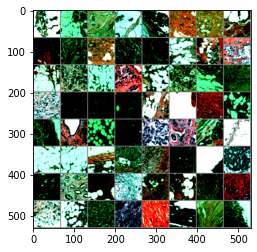

In [16]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
## look at a batch
data_iter = iter(BC_dataloader)
images, labels = data_iter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [25]:
os.getcwd()

'/projectnb2/dl523/projects/COVIDCT2/Ziwei/scripts'